In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as LinearRegression_scikit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [48]:
# Import Data
data = pd.read_csv("Salaries.csv")
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1608 non-null   float64
 1   annual_base_pay         1651 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB
None


,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
...,...,...
1650,1.0,60500.0
1651,6.0,164000.0
1652,7.0,150000.0
1653,5.0,75000.0


In [49]:
# Clean Data
data.dropna(inplace=True)
data.drop(data[data["annual_base_pay"] < 20000].index, inplace=True)
data.drop(data[data["annual_base_pay"] > 500000].index, inplace=True)
# print(data.to_string())
print(data.describe())
data.head(5)

       total_experience_years  annual_base_pay
count             1480.000000      1480.000000
mean                 6.743466    104388.848392
std                  5.404630     55155.549373
min                  0.000000     20000.000000
25%                  3.000000     67500.000000
50%                  5.000000    100000.000000
75%                 10.000000    130000.000000
max                 43.000000    500000.000000


,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0


<AxesSubplot: xlabel='total_experience_years', ylabel='annual_base_pay'>

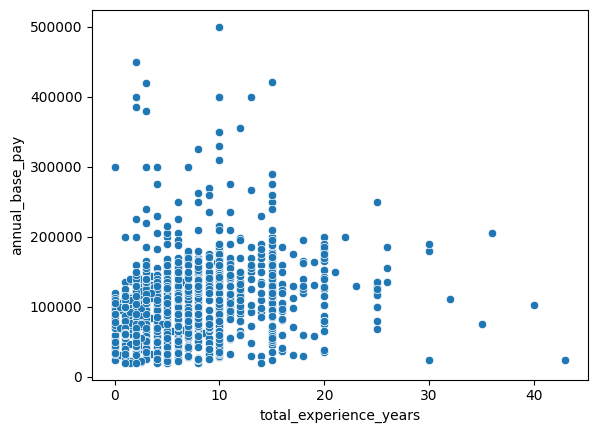

In [50]:
sns.scatterplot(data, x="total_experience_years", y="annual_base_pay")

In [51]:
# Split Data
# training, testing = train_test_split(data, train_size=0.7)

split_index = int(len(data.index) * 0.7)

training_data, testing_data = data.iloc[:split_index], data.iloc[split_index:]

<AxesSubplot: xlabel='total_experience_years', ylabel='annual_base_pay'>

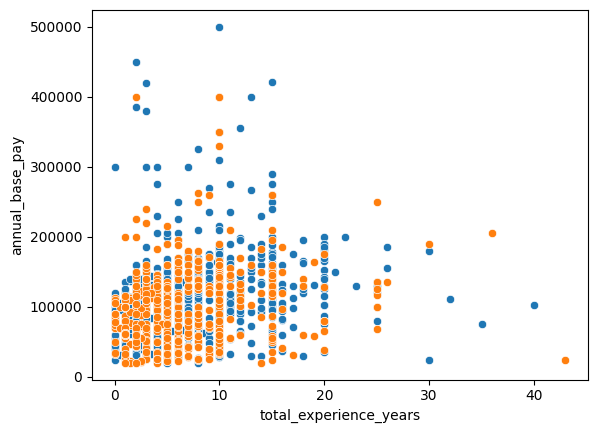

In [52]:
sns.scatterplot(training_data, x="total_experience_years", y="annual_base_pay")
sns.scatterplot(testing_data, x="total_experience_years", y="annual_base_pay")

---
## Linear Regression

In [53]:
# Linear Regression Algorithm
# y = mx + b

def LinearRegression(data, x, y):
    x = data[x].to_numpy()
    y = data[y].to_numpy()

    if np.size(x) != np.size(y):
        raise ValueError("x and y values are not equal")

    # sample size (n)
    sample_size_n = np.size(x)

    # mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y)

    # sum of squares / deviation about x
    SS_xy = np.sum(y * x) - sample_size_n * mean_y * mean_x
    SS_xx = np.sum(x * x) - sample_size_n * mean_x * mean_x
    
    m = SS_xy / SS_xx
    b = mean_y - m * mean_x

    return (m, b)

In [54]:
# Linear Regression Training
regression_line = LinearRegression(training_data, x="total_experience_years", y="annual_base_pay")
regression_line
print("y = {}x + {}".format(regression_line[0], regression_line[1]))

y = 2870.5279005218395x + 87084.1302232299


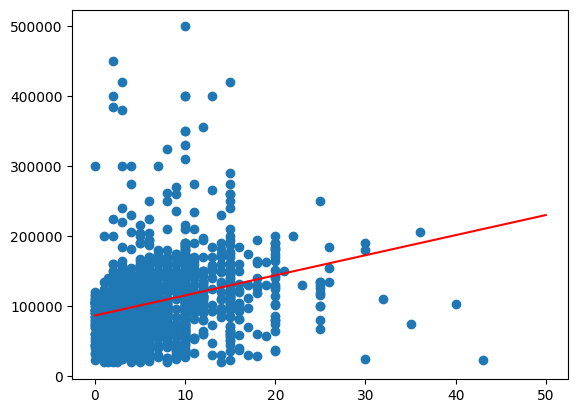

In [55]:
# Regression Line Plot
x = np.linspace(0, 50, 1000)
y = (regression_line[0] * x) + regression_line[1]

plt.scatter(data["total_experience_years"], data["annual_base_pay"])
plt.plot(x,y,"red")

plt.show()

In [56]:
# Prediction
predict = lambda m, b, x: m * x + b;

print(predict(regression_line[0], regression_line[1], 24))

155976.79983575403


In [57]:
# Mean Squared Error (MSE)
def evaluation_squared_error(m, b, actual_data, squared=False):
    squared_total = 0
    
    for index, row in actual_data.iterrows():
        # y = mx + b
        # y_actual - y_predicted
        squared_total += ((row["annual_base_pay"]) - (m * row["total_experience_years"] + b)) ** 2

    mean_squared = (1 / len(actual_data.index)) * squared_total

    if squared: 
        return sqrt(mean_squared) 
    else:
        return mean_squared

In [58]:
evaluation_method = evaluation_squared_error(regression_line[0], regression_line[1], testing_data, True)
print("RMSE Evaluation Method:", evaluation_method)

RMSE Evaluation Method: 56587.35560137332


In [59]:
def get_predicted_y(m, b, data):
    predicted_y = []
    for index, row in data.iterrows():
        predicted_y.append(m * row["total_experience_years"] + b)
    return predicted_y

predicted_y = get_predicted_y(regression_line[0], regression_line[1], testing_data)
actual_y = testing_data["annual_base_pay"].values.tolist()

mse = mean_squared_error(actual_y, predicted_y)
print("MSE:", mse)
print("RMSE:", sqrt(mse))

MSE: 3202128813.9562745
RMSE: 56587.3556013733


---
## Linear Regression (sklearn)

In [60]:
training_data

,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
...,...,...
1132,7.0,85000.0
1133,6.0,83000.0
1134,13.0,267000.0
1136,10.0,160000.0


In [61]:
# Linear Regression
model = LinearRegression_scikit()
x = training_data[["total_experience_years"]]
y = training_data["annual_base_pay"]
model.fit(x, y)
# Y_predicted = model.predict(X_testing)

# (m,b)
scikit_model = (model.coef_.tolist()[0], model.intercept_)
scikit_model

(2870.5279005218385, 87084.13022322992)

In [62]:
evaluation_method = evaluation_squared_error(scikit_model[0], scikit_model[1], testing_data, True)
print("RMSE Evaluation Method (sklearn):", evaluation_method)

RMSE Evaluation Method (sklearn): 56587.35560137332


---
## Linear Regression (seaborn)

<AxesSubplot: xlabel='total_experience_years', ylabel='annual_base_pay'>

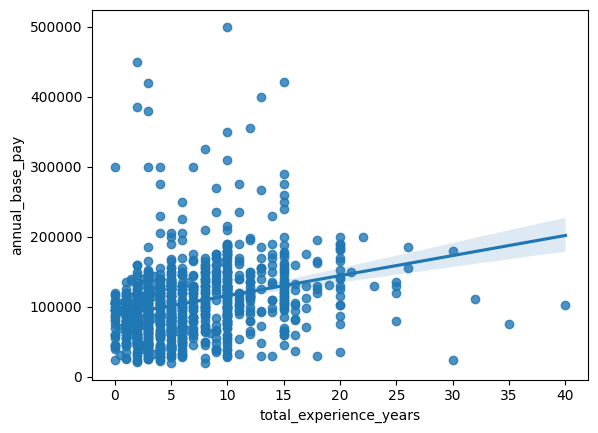

In [63]:
sns.regplot(data=training_data, x="total_experience_years", y="annual_base_pay")